In [1]:
import tensorflow
import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '/content/drive/MyDrive/CatClassifier/train'

In [3]:
train_datagen = ImageDataGenerator(validation_split=0.2,rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    subset='training',
    class_mode='binary',
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)


Found 20001 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


0
1.0


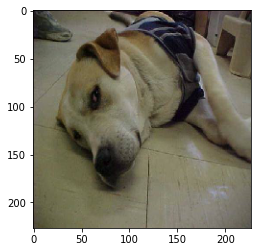

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for idx,data in enumerate(train_generator):
    if idx == 1 : break
    print(idx)
    X, y = data
    foo = X[0]
    plt.imshow(foo)
    print(y[0])

In [11]:
model = keras.models.Sequential([
    # 1st Conv Layer
    keras.layers.Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # 2nd Conv Layer
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # 3rd Conv Layer
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # 4th Conv Layer
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # 5th Conv Layer
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Flatten(),
    
    # 1st FC Layer
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    # 2nd FC Layer
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    # 3rd FC Layer
    keras.layers.Dense(2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, decay = 0.0005),
              metrics=['accuracy'])

In [14]:
hist = model.fit_generator(train_generator,
                 steps_per_epoch=100, 
                 epochs = 15 , 
                 validation_data=validation_generator ,
                 validation_steps=50 ,
                 verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 1873s 19s/step - loss: 1.9912 - accuracy: 0.5407 - val_loss: 3.6098 - val_accuracy: 0.5131
Epoch 2/15
100/100 [==============================] - 1505s 15s/step - loss: 1.4343 - accuracy: 0.5658 - val_loss: 0.7013 - val_accuracy: 0.6031
Epoch 3/15
100/100 [==============================] - 1168s 12s/step - loss: 0.9043 - accuracy: 0.6096 - val_loss: 0.6399 - val_accuracy: 0.6363
Epoch 4/15
100/100 [==============================] - 950s 10s/step - loss: 0.7573 - accuracy: 0.6501 - val_loss: 0.5839 - val_accuracy: 0.6994
Epoch 5/15
100/100 [==============================] - 749s 7s/step - loss: 0.7117 - accuracy: 0.6522 - val_loss: 0.5939 - val_accuracy: 0.6831
Epoch 6/15
100/100 [==============================] - 631s 6s/step - loss: 0.6620 - accuracy: 0.6523 - val_loss: 0.6067 - val_accuracy: 0.6781
Epoch 7/15
100/100 [==============================] - 512s 5s/step - loss: 0.6413 - accuracy: 0.6685 - val_loss: 0.6541 - val_accuracy:

In [15]:
model.save('/content/drive/MyDrive/CatClassifier/AlexNet|/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CatClassifier/AlexNet|/assets


In [16]:
model.save('/content/drive/MyDrive/CatClassifier/AlexNet/alexnet_ver0.h5')